# Stitching
Questions 2.1.1 - 2.2.4

2.1.1 Compute SIFT keypoints and corresponding descriptors for images 1Hill
and 2Hill. (3 points)

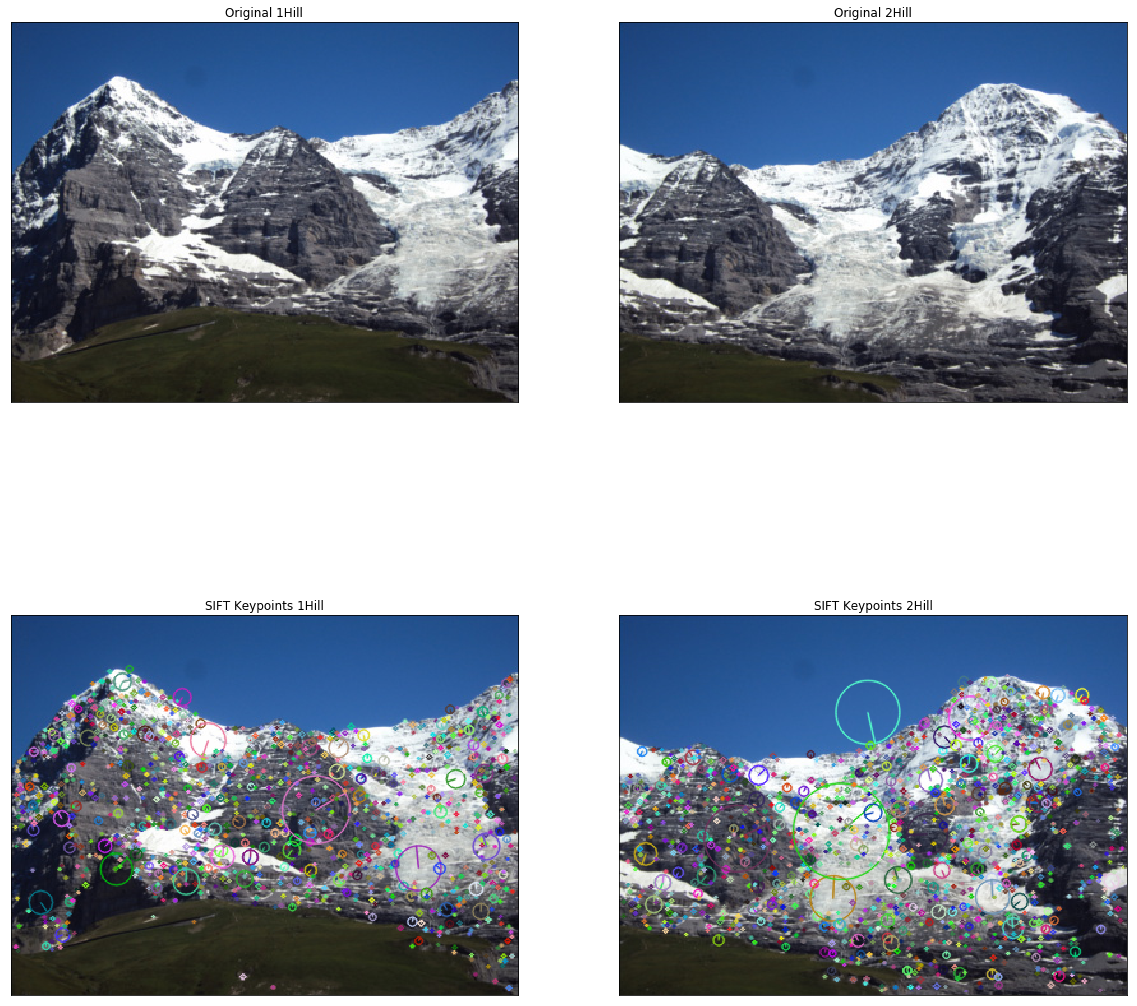

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1Hill = cv2.imread("1Hill.JPG")
img2Hill = cv2.imread("2Hill.JPG")
img3Hill = cv2.imread("3Hill.JPG")

# Convert to RGB
img1Hill = cv2.cvtColor(img1Hill,cv2.COLOR_BGR2RGB)
img2Hill = cv2.cvtColor(img2Hill,cv2.COLOR_BGR2RGB)
img3Hill = cv2.cvtColor(img3Hill,cv2.COLOR_BGR2RGB)

#Remove white border of image
crop = 1
img1Hill = img1Hill[crop:img1Hill.shape[0]-crop, crop:img1Hill.shape[1]-crop]
img2Hill = img2Hill[crop:img2Hill.shape[0]-crop, crop:img2Hill.shape[1]-crop]
img3Hill = img3Hill[crop:img3Hill.shape[0]-crop, crop:img3Hill.shape[1]-crop]

# Compute SIFT Keypoints in each image
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
kpts1Hill, desc1Hill = sift.detectAndCompute(img1Hill, None)
kpts2Hill, desc2Hill = sift.detectAndCompute(img2Hill, None)

# Draw sift features to images
imgDisp1 = img1Hill.copy()
imgDisp2 = img2Hill.copy()

cv2.drawKeypoints(imgDisp1, kpts1Hill, imgDisp1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(imgDisp2, kpts2Hill, imgDisp2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Draw images
images = [ img1Hill, img2Hill, imgDisp1,imgDisp2,]
titles = ["Original 1Hill","Original 2Hill","SIFT Keypoints 1Hill", "SIFT Keypoints 2Hill"]

plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


2.1.2 Find matching keypoints in two images and display the 20 best pairs. (4
points)

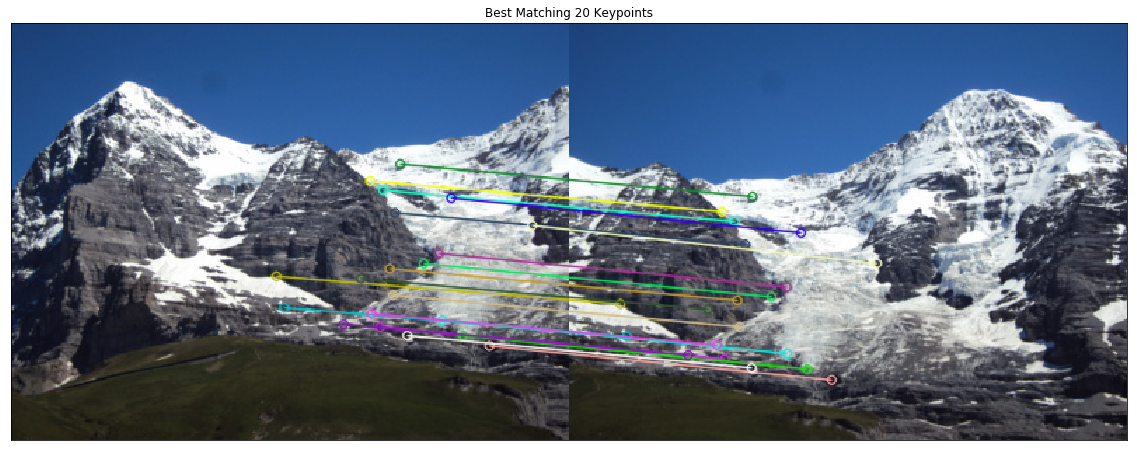

In [10]:
# Find matching keypoints in both images

img1Hill = cv2.imread("1Hill.JPG")
img2Hill = cv2.imread("2Hill.JPG")
img3Hill = cv2.imread("3Hill.JPG")

img1Hill = cv2.cvtColor(img1Hill,cv2.COLOR_BGR2RGB)
img2Hill = cv2.cvtColor(img2Hill,cv2.COLOR_BGR2RGB)
img3Hill = cv2.cvtColor(img3Hill,cv2.COLOR_BGR2RGB)

#Remove white border of image
crop = 1
img1Hill = img1Hill[crop:img1Hill.shape[0]-crop, crop:img1Hill.shape[1]-crop]
img2Hill = img2Hill[crop:img2Hill.shape[0]-crop, crop:img2Hill.shape[1]-crop]
img3Hill = img3Hill[crop:img3Hill.shape[0]-crop, crop:img3Hill.shape[1]-crop]


# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(desc1Hill,desc2Hill)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 20 matches.
matchingImage = cv2.drawMatches(img1Hill,kpts1Hill,img2Hill,kpts2Hill, matches[:20], img1Hill, flags=2)

# display matching image
plt.figure(figsize=(20,20))
plt.imshow(matchingImage)
plt.title("Best Matching 20 Keypoints")
plt.xticks([]),plt.yticks([])
plt.show()

2.1.3 Find homography using RANSAC method and apply transformation to
1Hill. Image 2Hill should not be transformed. (7 points)

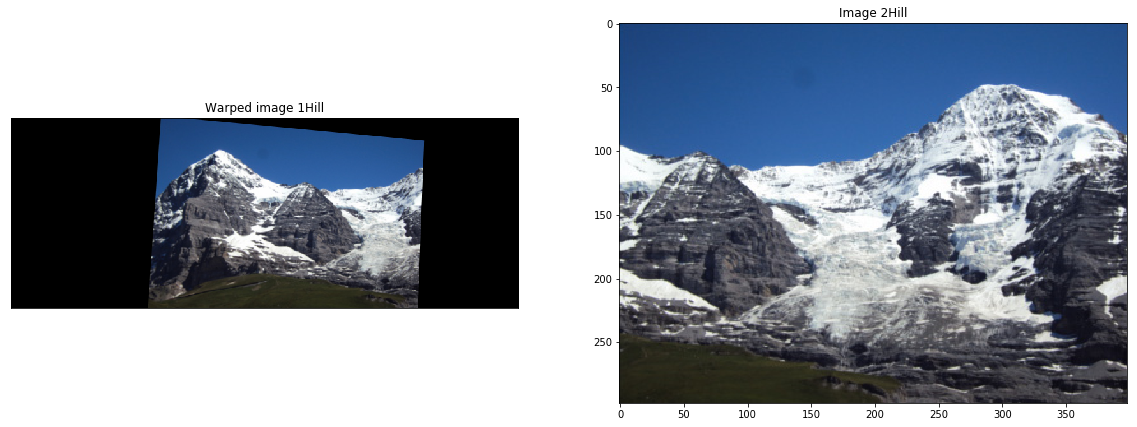

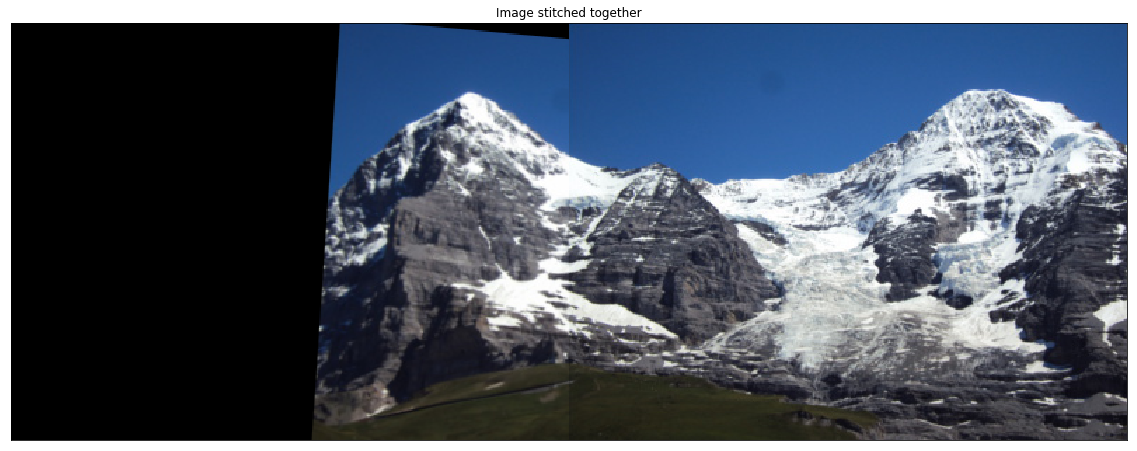

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1Hill = cv2.imread("1Hill.JPG")
img2Hill = cv2.imread("2Hill.JPG")
img3Hill = cv2.imread("3Hill.JPG")

img1Hill = cv2.cvtColor(img1Hill,cv2.COLOR_BGR2RGB)
img2Hill = cv2.cvtColor(img2Hill,cv2.COLOR_BGR2RGB)
img3Hill = cv2.cvtColor(img3Hill,cv2.COLOR_BGR2RGB)

#Remove white border of image
crop = 1
img1Hill = img1Hill[crop:img1Hill.shape[0]-crop, crop:img1Hill.shape[1]-crop]
img2Hill = img2Hill[crop:img2Hill.shape[0]-crop, crop:img2Hill.shape[1]-crop]
img3Hill = img3Hill[crop:img3Hill.shape[0]-crop, crop:img3Hill.shape[1]-crop]


# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)
# Find homography in img1Hill
# Match descriptors again and sort them.
matches = bf.match(desc1Hill,desc2Hill)
matches = sorted(matches, key = lambda x:x.distance)

# place good matches in an array together, side by side
# queryIdx matches with desc1Hill, trainIdx matches with desc2 hill
GoodMatches = []
for i, m in enumerate(matches):
    GoodMatches.append((m.trainIdx, m.queryIdx))

# Separate matches into their own 1d array for each image
matchesHill2 = np.float32([kpts2Hill[i].pt for (i, __) in GoodMatches])
matchesHill1 = np.float32([kpts1Hill[i].pt for (__, i) in GoodMatches])

for i in range(len(matchesHill2)):
    matchesHill2[i][0] += img2Hill.shape[1]

# Compute homography using the RANSAC method
Homography, mask = cv2.findHomography(matchesHill1,matchesHill2, cv2.RANSAC, 4)

# Apply homography to image 1 to warp its perspective to img2's
warpedImage = cv2.warpPerspective(img1Hill, Homography,(img1Hill.shape[1]+img2Hill.shape[1],img1Hill.shape[0]))

appendImage = warpedImage.copy()

warpedImage[:,img1Hill.shape[1]:,:] = img2Hill


#appendImage[:,img1Hill.shape[1]:,:] = img2Hill

# display stitched image image
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(appendImage)
plt.title("Warped image 1Hill")
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img2Hill)
plt.title("Image 2Hill")
plt.show()

plt.figure(figsize=(20,20))
plt.imshow(warpedImage)
plt.title("Image stitched together")
plt.xticks([]),plt.yticks([])
plt.show()

2.1.4 Stitch transformed 1Hill and original 2Hill together using pyramid image blending. (8 points)

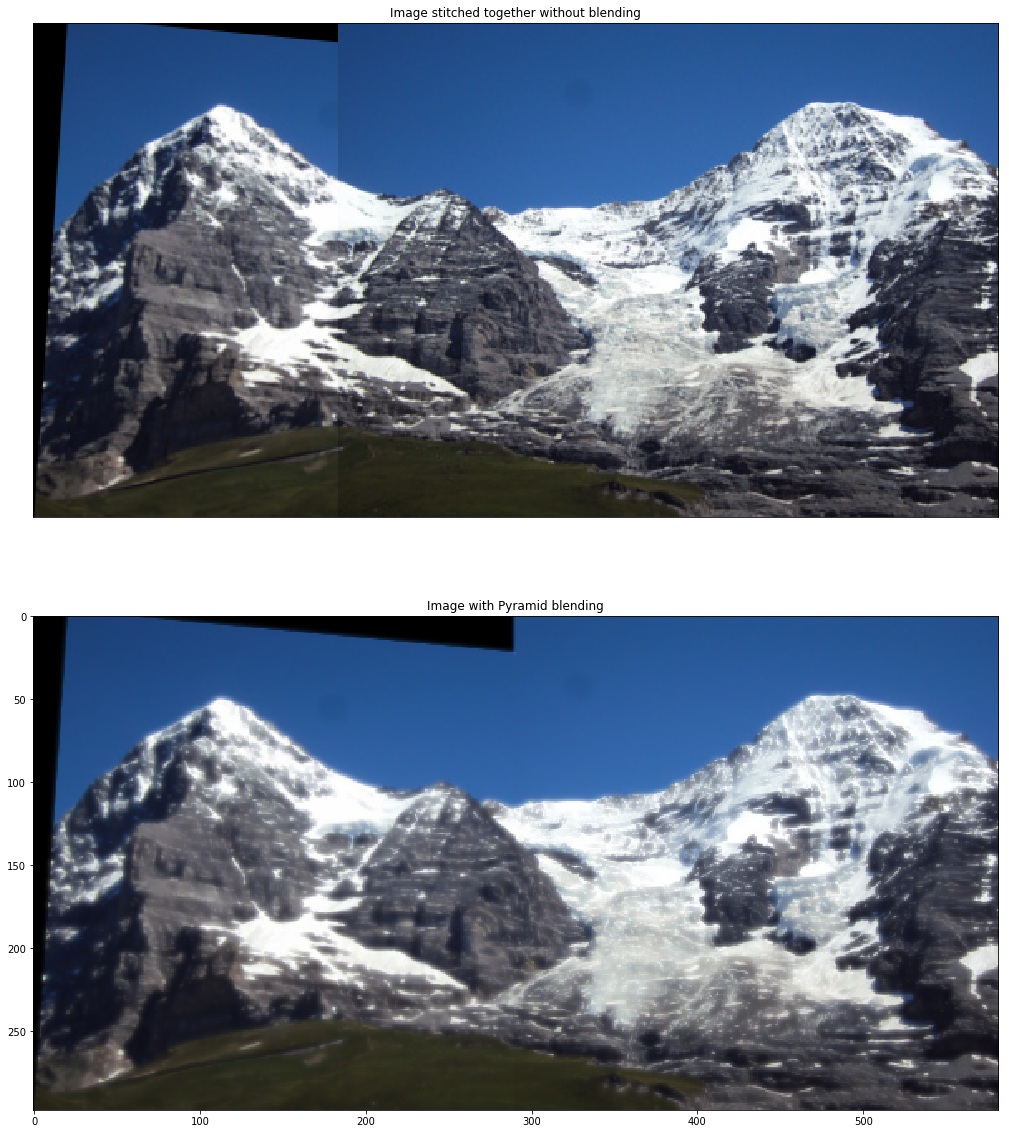

In [12]:
# Pyramid blend images together

import cv2
import numpy as np
import matplotlib.pyplot as plt

# First copy images not to overwrite.
imgHillLeft = appendImage.copy()
imgHillRight = img2Hill.copy()

g_size = 255  # gaussian mask blur size
depth = 2  # pyramid depth size

# Need to trim two images to remove extra black space.
# Define function trim() to do this
# returns x,y,w,h of bounding box of image
def trim(img):
    greyImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(greyImg, 0, 255, cv2.THRESH_BINARY)
    return cv2.boundingRect(thresh)

# Trim images to the left, to remove extra pixels after warp.
trimVal= trim(imgHillLeft)[0]

imgHillLeft = imgHillLeft[:,trimVal:]
add = np.zeros((imgHillRight.shape), np.uint8)
imgHillRight = np.hstack((add,imgHillRight))
imgHillRight = imgHillRight[:,trimVal:]
warpedImage = warpedImage[:,trimVal:]



# Define size of image, which is size of appended image
row, col, dpt = warpedImage.shape

# Calculate Gaussian pyramids
#gpLeft = GaussianPyramid(imgHillLeft, depth)
G = imgHillLeft.copy()
gpLeft = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gpLeft.append(G)
    
#gpRight = GaussianPyramid(imgHillRight, depth)
G = imgHillRight.copy()
gpRight = [G]
for i in range(depth):
    G = cv2.pyrDown(G)
    gpRight.append(G)

# Calculate Laplacian Pyramids
#lpLeft = LaplacianPyramid(gpLeft)
lpLeft = [gpLeft[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gpLeft[i], dstsize=(gpLeft[i-1].shape[1], gpLeft[i-1].shape[0]))
    lp = cv2.subtract(gpLeft[i-1], hr, cv2.CV_32F)  # subtract different levels
    lpLeft.append(lp)
        
#lpRight = LaplacianPyramid(gpRight)
lpRight = [gpRight[depth-1]]  # store last gaussian image for top of lp pyramid
for i in range(depth-1,0,-1):
    # upsample lower pyramid
    hr = cv2.pyrUp(gpRight[i], dstsize=(gpRight[i-1].shape[1], gpRight[i-1].shape[0]))
    lp = cv2.subtract(gpRight[i-1], hr, cv2.CV_32F)  # subtract different levels
    lpRight.append(lp)

# add left and right halves of images in each level
mtnPyramid = []
for lapA, lapB in zip(lpLeft, lpRight):
    row, cols, ch = lapA.shape
    # stack columns (half and half)
    lap = np.hstack((lapA[:, 0:int(cols/2)], lapB[:, int(cols/2):]))
    mtnPyramid.append(lap)


# Reconstruct mountain from laplacian pyramid 


reconstruct = mtnPyramid[0]
for i in range(1, depth):
    size = (mtnPyramid[i].shape[1],mtnPyramid[i].shape[0])
    reconstruct = cv2.pyrUp(reconstruct, dstsize = size)
    reconstruct = cv2.add(mtnPyramid[i], reconstruct)
    
# display images
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(warpedImage)
plt.title("Image stitched together without blending")
plt.xticks([]),plt.yticks([])
plt.subplot(212)
plt.imshow(reconstruct)
plt.title("Image with Pyramid blending")
plt.show()


Let's call the above resulting image 12Hill. Implement the following steps
to stitch 12Hill and 3Hill.
2.2.1. Compute SURF keypoints and corresponding descriptors for images 12Hill
and 3Hill. (3 points)

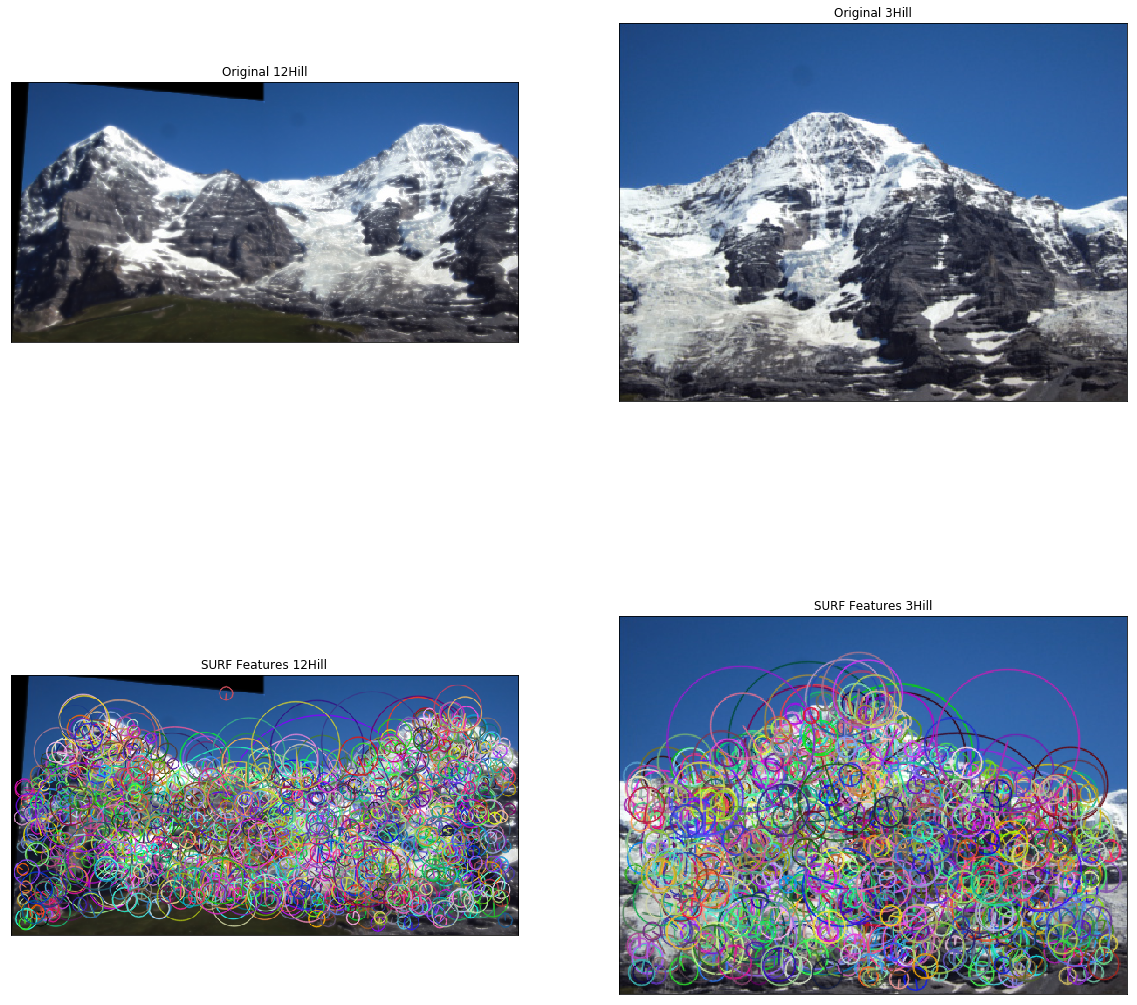

In [13]:
img12Hill = reconstruct.copy()
img3Hill = img3Hill.copy()

# Trim image img3Hill to remove white border of 1 pixel on edge
img3Hill = img3Hill[1:img3Hill.shape[0]-1,1:img3Hill.shape[1]]

# Convert images to greyscale
gray12Hill = cv2.cvtColor(img12Hill, cv2.COLOR_RGB2GRAY)
gray3Hill = cv2.cvtColor(img3Hill,cv2.COLOR_RGB2GRAY)

# Create SURF object
surf = cv2.xfeatures2d.SURF_create()


# Compute surf keypoints and descriptors on greyscale images of 12Hill and 3Hill
kpts12Hill, desc12Hill = surf.detectAndCompute(gray12Hill, None)
kpts3Hill, desc3Hill = surf.detectAndCompute(gray3Hill, None)

# Draw the keypoints on the images in color
img12Hill_disp = img12Hill.copy()
img3Hill_disp = img3Hill.copy()

# Draw SURF keypoints on images.
cv2.drawKeypoints(img12Hill,kpts12Hill,img12Hill_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img3Hill,kpts3Hill,img3Hill_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Display Images
imgArr = [img12Hill,img3Hill,img12Hill_disp, img3Hill_disp]
titleArr = ["Original 12Hill","Original 3Hill", "SURF Features 12Hill", "SURF Features 3Hill"]

plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(imgArr[i])
    plt.title(titleArr[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

2.2.2 Find matching keypoints in two images and display the 20 best pairs. (4
points)

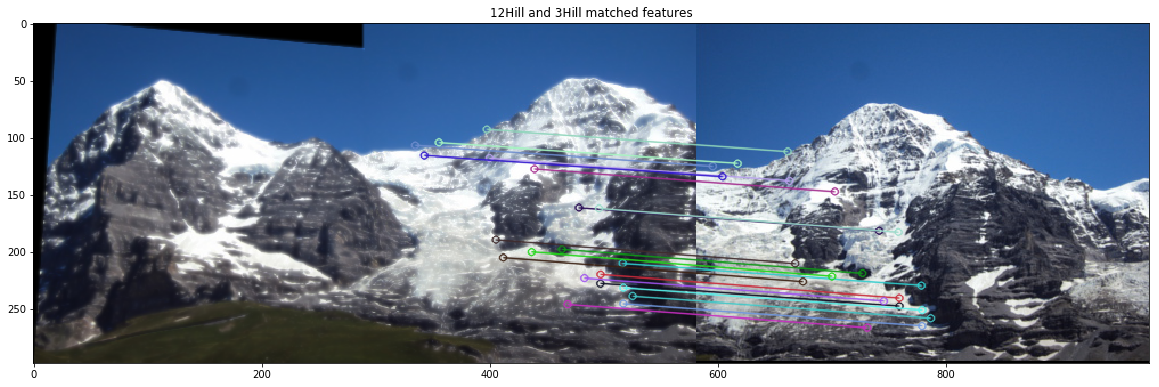

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Copy images to keep above variables unchanged

img12HillLeft = img12Hill.copy()
img3HillRight = img3Hill.copy()

# Compute matches
surfMatches = bf.match(desc12Hill,desc3Hill)
# Sort ascending
surfMatches = sorted(surfMatches, key= lambda x:x.distance)

# Draw top 20 matches on images.
imgDisplay = cv2.drawMatches(img12HillLeft, kpts12Hill, img3HillRight, kpts3Hill, surfMatches[:20],img12HillLeft,flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgDisplay)
plt.title("12Hill and 3Hill matched features")
plt.show()


2.2.3 Find homography using RANSAC method and apply transformation to
3Hill. Image 12Hill should not be transformed. (7 points)

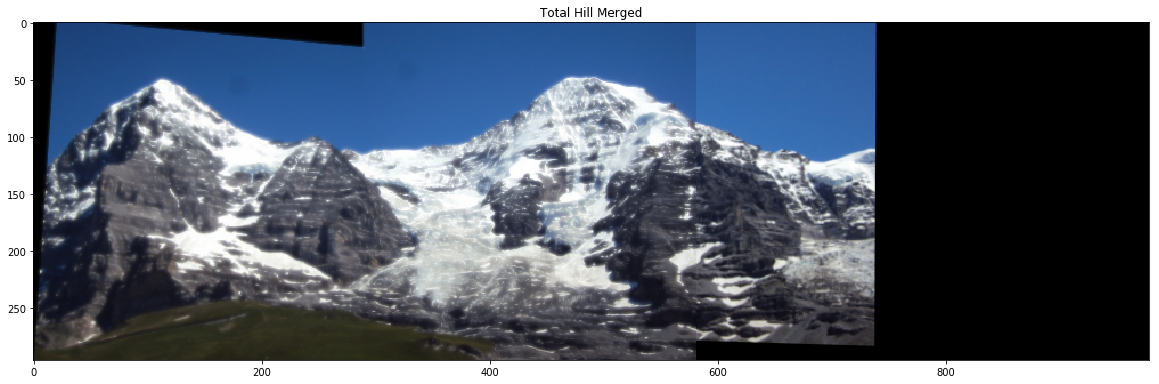

In [15]:
# Arrange matching keypoints in two separate lists
mtnMatches = []
for i, m in enumerate(surfMatches):
    mtnMatches.append((m.trainIdx, m.queryIdx))

matchPointsLeft = np.float32([kpts12Hill[i].pt for (__, i) in mtnMatches])
matchPointsRight = np.float32([kpts3Hill[i].pt for (i, __) in mtnMatches])

# Find homography of two images
Homography123, suh = cv2.findHomography(matchPointsRight,matchPointsLeft, cv2.RANSAC,4)
# Compute warping of img3Hill
warp3Hill = cv2.warpPerspective(img3Hill, Homography123, (img12Hill.shape[1]+img3Hill.shape[1],img3Hill.shape[0]))
warp3Hill_disp = warp3Hill.copy()

# must modify height of img12Hill to allow warp to fit, create array of 0's
#img12Hill = np.zeros((img12Hill.shape[0],img12Hill.shape[1]+img3Hill.shape[1],3), dtype=np.uint8)
img12HillFinal = img12Hill[:img12Hill.shape[0]-2,:]

warp3Hill[:,:img12Hill.shape[1],:] = img12HillFinal

plt.figure(figsize=(20,20))
plt.imshow(warp3Hill)
plt.title("Total Hill Merged")
plt.show()


2.2.4. Stitch transformed 3Hill and 12Hill together and apply linear image
blending. (4 points)

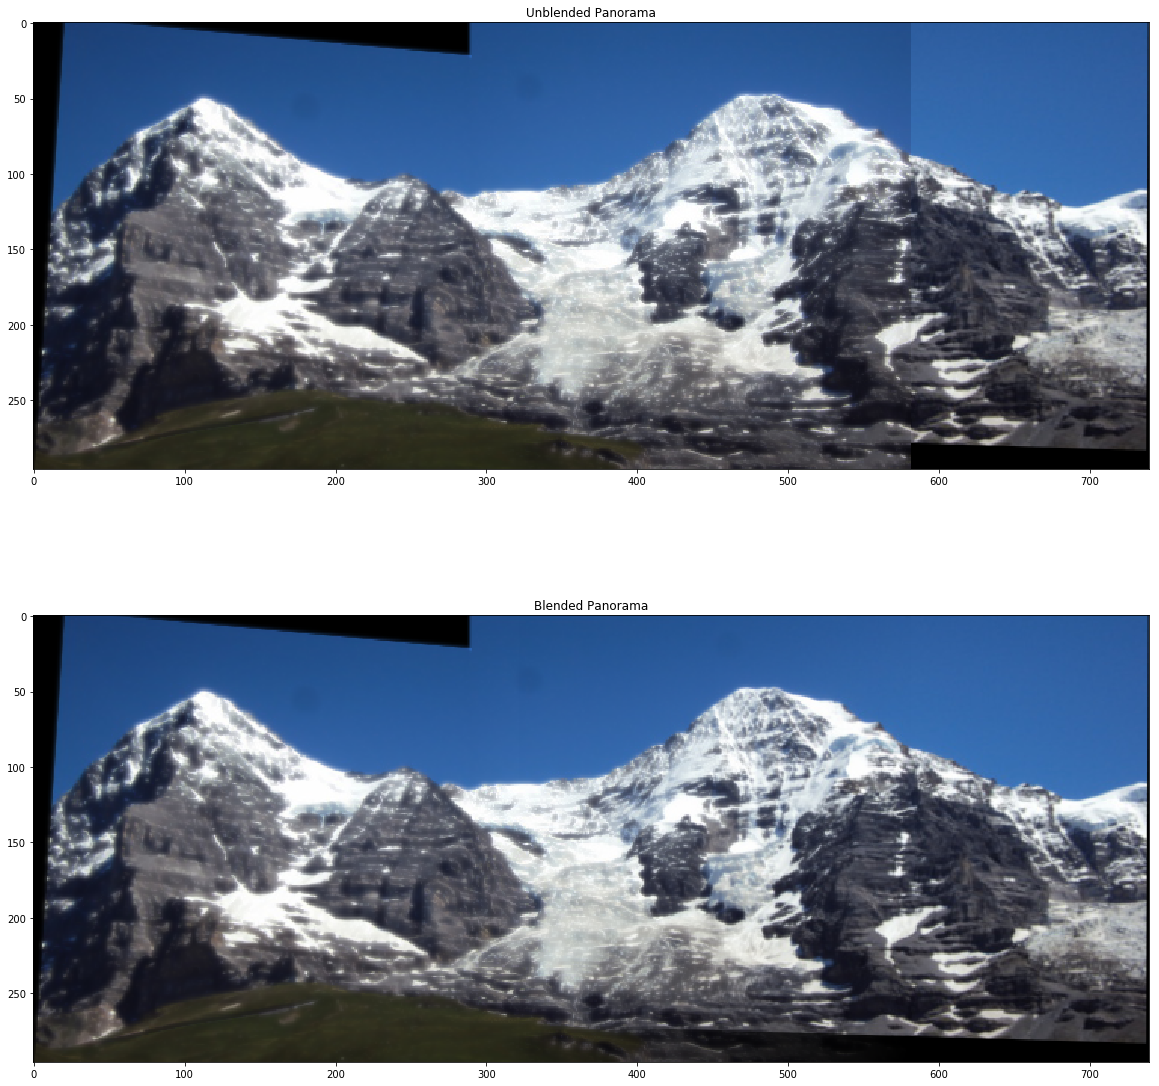

In [16]:
# Copy images from previous code

imgBlendLeft = img12HillFinal.copy()
imgBlendRight = warp3Hill_disp.copy()
imgPanoramaUnblended = warp3Hill.copy()

# First, crop panoramic image and hill3Warp
trimRight= trim(imgPanoramaUnblended)[2]
imgPanoramaUnblended = imgPanoramaUnblended[:,:trimRight]
xStart,__,trimRight2,__ = trim(imgBlendRight)
imgBlendRightTrim = imgBlendRight[:,:xStart+trimRight2]

# Make 12Hill correct size to allow bitwise and
img12HillNew = np.zeros(imgPanoramaUnblended.shape)
for y in range (imgBlendLeft.shape[0]):
    for x in range(imgBlendLeft.shape[1]):
        img12HillNew[y][x] = imgBlendLeft[y][x]
        
# Convert to 8 bit
img12HillNew = np.uint8(img12HillNew)

# Apply blend manually
# For pixels in merged image, apply linear blend
# Define values for ramp

# Find intersection zone of two images
imgALeft = cv2.cvtColor(img12HillNew,cv2.COLOR_RGB2GRAY)
imgBLeft = cv2.cvtColor(imgBlendRightTrim,cv2.COLOR_RGB2GRAY)
imgLeftGrey = cv2.threshold(imgALeft,0,255,cv2.THRESH_BINARY)[1]
imgRightGrey = cv2.threshold(imgBLeft,0,255, cv2.THRESH_BINARY)[1]
intersection = cv2.bitwise_and(imgLeftGrey,imgRightGrey)
inter_start_x,inter_start_y,inter_width_x,inter_height_y = cv2.boundingRect(intersection)

ramp_size = inter_width_x
ramp_center = inter_start_x + 30 + inter_width_x/2
ramp_start = inter_start_x
ramp_end = inter_start_x+ramp_size

# Define empty array in which blended image will be put
imgPanoramaBlended = np.zeros((imgPanoramaUnblended.shape[0],imgPanoramaUnblended.shape[1],3))

for y in range(imgPanoramaBlended.shape[0]):
    for x in range(imgPanoramaBlended.shape[1]):
        # If incrementor is not within ramp area
        if((x < ramp_start)):
            imgPanoramaBlended[y][x] = img12HillNew[y][x]
        # If incrementor is within ramp zone
        elif(x >= ramp_start and x <= ramp_end):
            # Define proportionality factor which weighs how much pixel is worth
            prop = (abs(x-ramp_start))/ramp_size
            imgPanoramaBlended[y][x] = (1-prop) * img12HillNew[y][x] + (prop) * imgBlendRightTrim[y][x]
        elif(x > ramp_end):
            imgPanoramaBlended[y][x] = imgBlendRightTrim[y][x]

# convert back to uint8
imgPanoramaBlended = np.uint8(imgPanoramaBlended) 

plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(imgPanoramaUnblended)
plt.title("Unblended Panorama")
plt.subplot(2,1,2)
plt.imshow(imgPanoramaBlended)
plt.title("Blended Panorama")
plt.show()
